In [ ]:
# DATA DIRI
# Nama Lengkap: Alim Tegar Wicaksono
# Email: alimtegar404@gmail.com
# No. Telepon: +6282327704440
# Username Dicoding: alimtegar
# URL Profil Dicoding: https://www.dicoding.com/users/alimtegar

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-19 16:48:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.25MB/s    in 45s     

2020-10-19 16:49:31 (6.77 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# Extract zip file
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
os.listdir('/tmp/rockpaperscissors')

['scissors', 'paper', 'rps-cv-images', 'rock', 'README_rpc-cv-images.txt']

In [4]:
import numpy as np
import shutil

base_dir = '/tmp/rockpaperscissors'
classes_dir = ['/scissors', '/paper', '/rock'];

val_ratio = 0.4;

for class_dir in classes_dir:
  train_dir = base_dir + '/train' + class_dir
  val_dir = base_dir + '/val' + class_dir

  if not os.path.exists(train_dir):
    os.makedirs(train_dir)
  if not os.path.exists(val_dir):
    os.makedirs(val_dir)

  src = base_dir + class_dir

  all_file_names = os.listdir(src)

  np.random.shuffle(all_file_names)
  train_file_names, val_file_names = np.split(np.array(all_file_names), [int(len(all_file_names) * (1 - val_ratio))])

  train_file_names = [src + '/' + name for name in train_file_names.tolist()]
  val_file_names = [src + '/' + name for name in val_file_names.tolist()]

  # Copy paste gambar
  for file_name in train_file_names:
    shutil.copy(file_name, base_dir + '/train' + class_dir)
  for file_name in val_file_names:
    shutil.copy(file_name, base_dir + '/val' + class_dir)


In [6]:
for class_dir in classes_dir:
    print(class_dir)
    print('Total images: ', len(os.listdir(src)))
    print('Train images: ', len(os.listdir(base_dir + '/train' + class_dir)))
    print('Val images: ', len(os.listdir(base_dir + '/val' + class_dir)))
    print()

/scissors
Total images:  726
Train images:  450
Val images:  300

/paper
Total images:  726
Train images:  427
Val images:  285

/rock
Total images:  726
Train images:  435
Val images:  291



In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = base_dir + '/train'
val_dir = base_dir + '/val'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 4,
    class_mode = 'categorical'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)
model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 8,
    validation_data = validation_generator,
    validation_steps = len(validation_generator),
    verbose = 2
)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Epoch 1/8
328/328 - 48s - loss: 0.6110 - accuracy: 0.7348 - val_loss: 0.2742 - val_accuracy: 0.9144
Epoch 2/8
328/328 - 48s - loss: 0.2848 - accuracy: 0.9040 - val_loss: 0.1909 - val_accuracy: 0.9361
Epoch 3/8
328/328 - 48s - loss: 0.2139 - accuracy: 0.9223 - val_loss: 0.1381 - val_accuracy: 0.9521
Epoch 4/8
328/328 - 48s - loss: 0.1819 - accuracy: 0.9390 - val_loss: 0.1367 - val_accuracy: 0.9566
Epoch 5/8
328/328 - 48s - loss: 0.1360 - accuracy: 0.9543 - val_loss: 0.1391 - val_accuracy: 0.9578
Epoch 6/8
328/328 - 48s - loss: 0.1299 - accuracy: 0.9642 - val_loss: 0.1460 - val_accuracy: 0.9623
Epoch 7/8
328/328 - 49s - loss: 0.1171 - accuracy: 0.9665 - val_loss: 0.1022 - val_accuracy: 0.9760
Epoch 8/8
328/328 - 49s - loss: 0.0800 - accuracy: 0.9779 - val_loss: 0.0783 - val_accuracy: 0.9806


Saving images.jpeg to images.jpeg
images.jpeg
rock 1.0


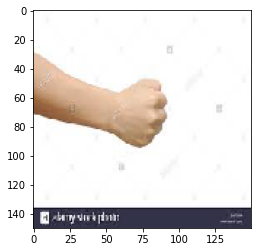

In [8]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

# Define labels
labels = ['rock', 'paper', 'scissors']

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(fn)

  print(labels[np.argmax(classes)], np.max(classes))